In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from scipy.stats import ttest_ind

In [20]:
# Load dataset
data = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\ab_testing.csv') 
data

,user_id,group,visit_date,page_version,time_on_page,clicked_CTA,converted,device_type,traffic_source
0,1,A,2024-01-17,Original,35,0,0,Tablet,Paid
1,2,B,2024-01-17,Optimized,24,1,0,Desktop,Social Media
2,3,B,2024-01-22,Optimized,11,1,0,Desktop,Organic
3,4,B,2024-01-20,Optimized,67,1,0,Desktop,Organic
4,5,A,2024-01-22,Original,38,1,0,Mobile,Paid
...,...,...,...,...,...,...,...,...,...
84995,84996,A,2024-01-01,Original,50,0,0,Mobile,Paid
84996,84997,B,2024-01-13,Optimized,57,1,0,Desktop,Social Media
84997,84998,B,2024-01-02,Optimized,71,1,0,Desktop,Organic
84998,84999,A,2024-01-15,Original,61,1,0,Desktop,Paid


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85000 entries, 0 to 84999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         85000 non-null  int64 
 1   group           85000 non-null  object
 2   visit_date      85000 non-null  object
 3   page_version    85000 non-null  object
 4   time_on_page    85000 non-null  int64 
 5   clicked_CTA     85000 non-null  int64 
 6   converted       85000 non-null  int64 
 7   device_type     85000 non-null  object
 8   traffic_source  85000 non-null  object
dtypes: int64(4), object(5)
memory usage: 5.8+ MB


array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'time_on_page'}>],
       [<Axes: title={'center': 'clicked_CTA'}>,
        <Axes: title={'center': 'converted'}>]], dtype=object)

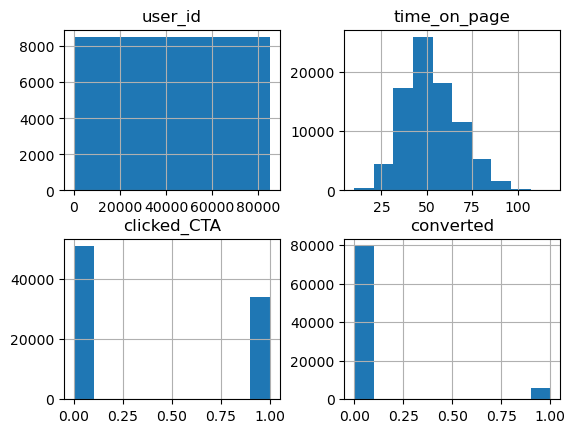

In [21]:
data.head()
data.info()
data.describe()
data.hist()

In [22]:
data.shape

(85000, 9)

In [23]:
# Calculate conversion rates for each group
conversion_rates = data.groupby('group')['converted'].mean()

In [24]:
# Perform t-test to compare conversion rates
group_a_conversions = data[data['group'] == 'A']['converted']
group_b_conversions = data[data['group'] == 'B']['converted']
t_stat, p_value = ttest_ind(group_a_conversions, group_b_conversions)

print("conversion_rates")
print("\nT-test Result:")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

conversion_rates

T-test Result:
T-statistic: -41.9717, P-value: 0.0000


In [25]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")

# handling of missing values
data = data.dropna() 

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicates: {duplicates}")
data = data.drop_duplicates()

Missing Values:
Number of duplicates: 0


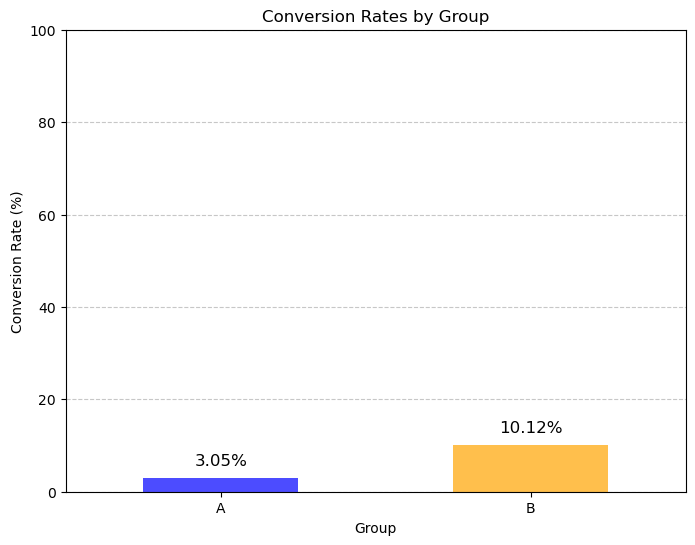

In [26]:
import matplotlib.pyplot as plt

# Assuming 'data' is already your DataFrame
conversion_rates = data.groupby('group')['converted'].mean()  # Calculate conversion rates for each group

# Convert conversion rates to percentage
conversion_rates_percentage = conversion_rates * 100

# Plotting the conversion rates
plt.figure(figsize=(8, 6))
ax = conversion_rates_percentage.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)

# Add title and labels
plt.title('Conversion Rates by Group')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Group')
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Set the y-axis to 0-100 since we are showing percentages
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage annotations on top of the bars
for i, v in enumerate(conversion_rates_percentage):
    ax.text(i, v + 2, f'{v:.2f}%', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

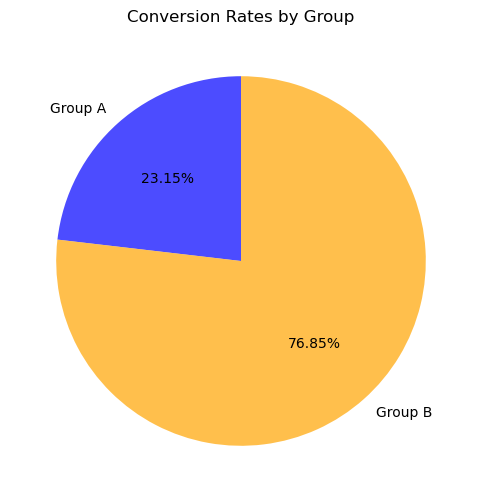

In [27]:
# Plotting a Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(conversion_rates_percentage, labels=['Group A', 'Group B'], autopct='%1.2f%%', 
        colors=['blue', 'orange'], startangle=90, wedgeprops={'alpha': 0.7})
plt.title('Conversion Rates by Group')
plt.show()

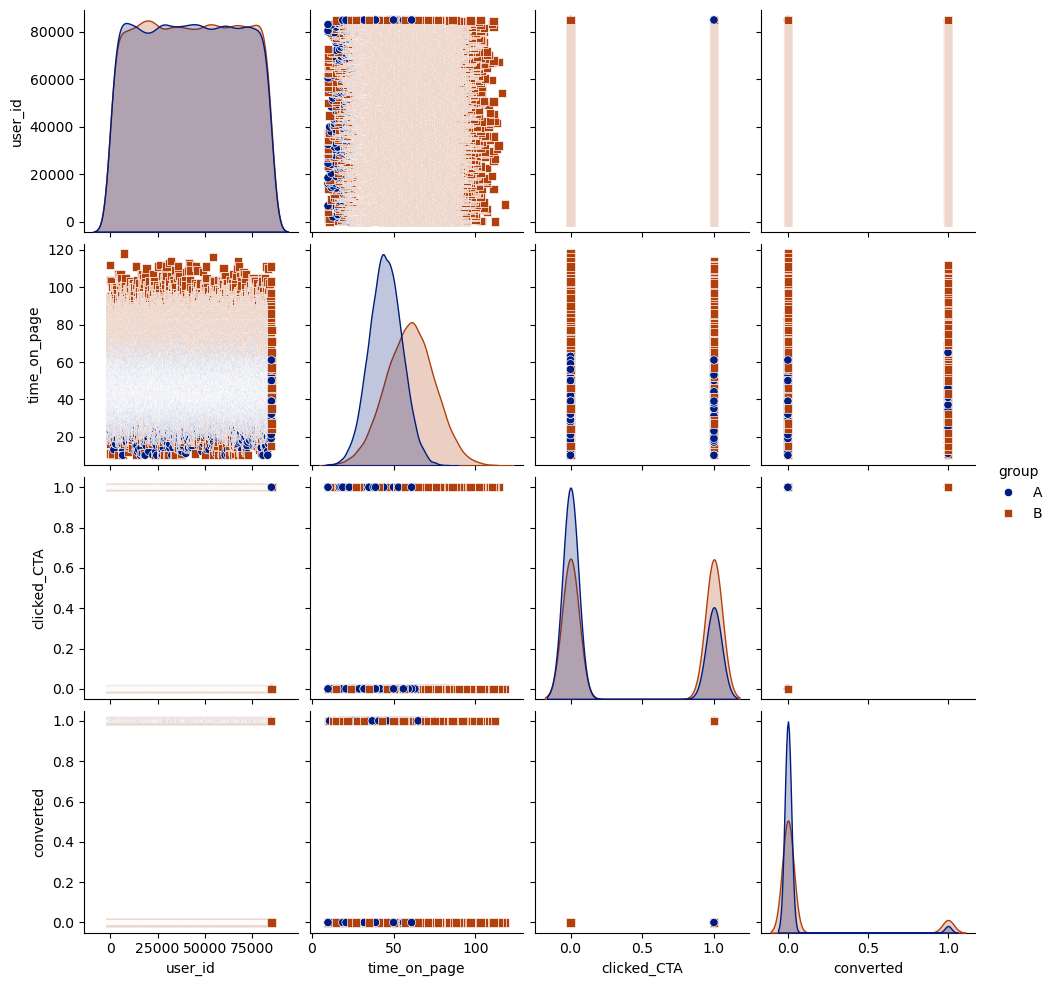

In [28]:
sns.pairplot(data, hue='group', palette= 'dark', markers=["o", "s"])
plt.show()

In [29]:
# Encodes 'group_B' as 1 for B, 0 for A
data = pd.get_dummies(data, columns=['group'], drop_first=True)  

In [30]:
# Features
X = data[['group_B', 'time_on_page', 'clicked_CTA']]  
y = data['converted']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
# Predict on test data
y_pred = model.predict(X_test)

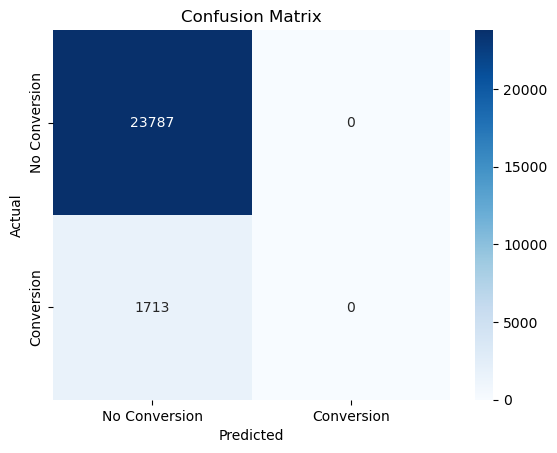

In [33]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Conversion", "Conversion"], yticklabels=["No Conversion", "Conversion"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9328235294117647
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97     23787
           1       0.00      0.00      0.00      1713

    accuracy                           0.93     25500
   macro avg       0.47      0.50      0.48     25500
weighted avg       0.87      0.93      0.90     25500



In [35]:
cv_scores = cross_val_score(LogisticRegression(), X, y, cv=5)
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: ", cv_scores.mean())

Cross-validation scores:  [0.93405882 0.93405882 0.93405882 0.93405882 0.93405882]
Mean CV score:  0.9340588235294117


In [36]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.2f}")

group_B: 0.12
time_on_page: 0.11
clicked_CTA: 0.77


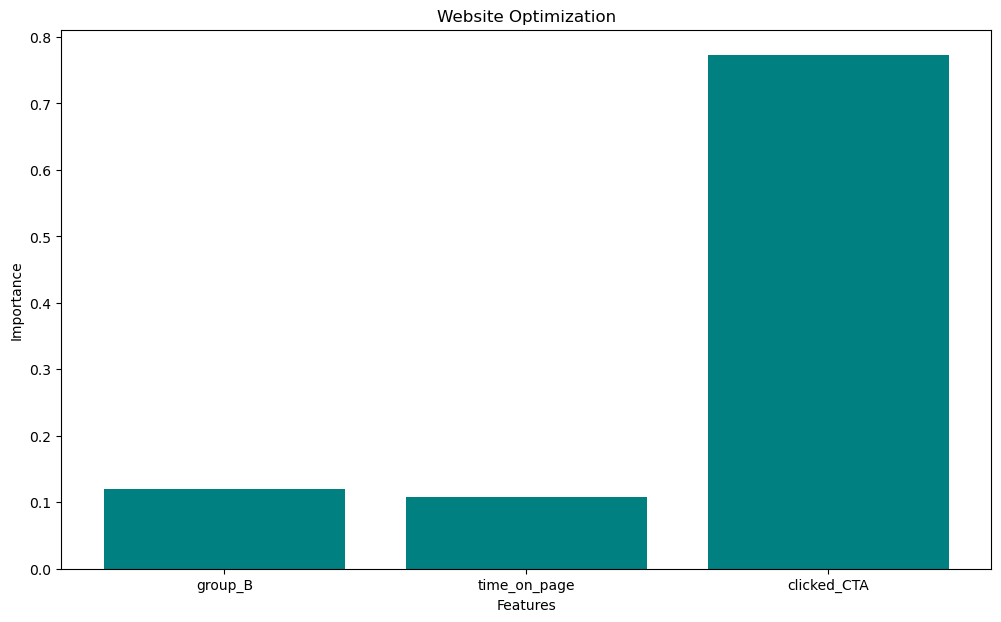

In [37]:
importances = rf_model.feature_importances_
plt.figure(figsize=(12,7))
plt.bar(feature_names, importances, color='teal')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Website Optimization')
plt.show()

In [38]:
for name, importance in zip(feature_names, importances):
    print(f"Feature: {name}, Importance: {importance:.2f}")

Feature: group_B, Importance: 0.12
Feature: time_on_page, Importance: 0.11
Feature: clicked_CTA, Importance: 0.77


In [39]:
if p_value < 0.05:
    print("Key Insights:")
    print("Conversion Rate Difference: Group B has a statistically significant higher conversion rate than Group A (p-value < 0.05).")
    print("\nRecommendations:")
    print("1. Implement the changes from Group B across the board, with a focus on improving user engagement to increase session durations and clicks.")
else:
    print("Key Insights:")
    print("Conversion Rate Difference: No statistically significant difference between Group A and Group B (p-value >= 0.05).")
    print("\nRecommendations:")
    print("1. Further analysis is needed to identify changes that could drive conversion improvement.")
    print("2. Continue experimenting with different optimization strategies and monitor performance.")

print("\nGeneral Recommendations:")
print("1. Focus on enhancing user engagement (e.g., increasing time spent on the page or CTA interaction).")
print("2. Apply insights from feature importance to target the most impactful features.")
print("3. Further refine marketing strategies based on the behavioral insights obtained from this analysis.")

Key Insights:
Conversion Rate Difference: Group B has a statistically significant higher conversion rate than Group A (p-value < 0.05).

Recommendations:
1. Implement the changes from Group B across the board, with a focus on improving user engagement to increase session durations and clicks.

General Recommendations:
1. Focus on enhancing user engagement (e.g., increasing time spent on the page or CTA interaction).
2. Apply insights from feature importance to target the most impactful features.
3. Further refine marketing strategies based on the behavioral insights obtained from this analysis.
